Setup

In [18]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.#for modeling data
import sklearn.model_selection as mod 

# Fancier, statistical plots.
import seaborn as sns

In [19]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

The Iris Dataset

In [20]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [21]:
# Have a look at the data.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
# Summary statistics.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


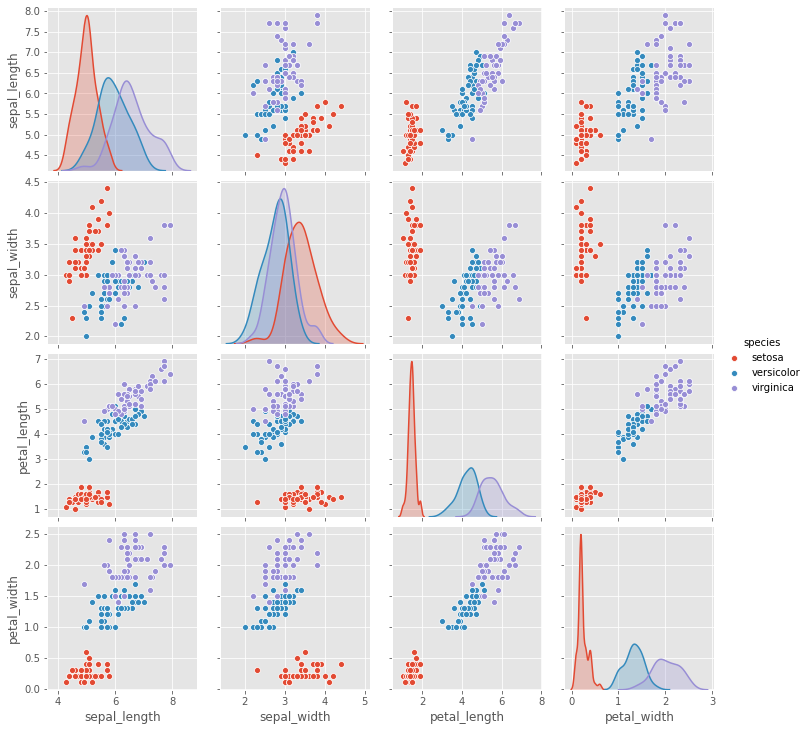

In [23]:
# Scatter plots and kdes.
sns.pairplot(df, hue='species');

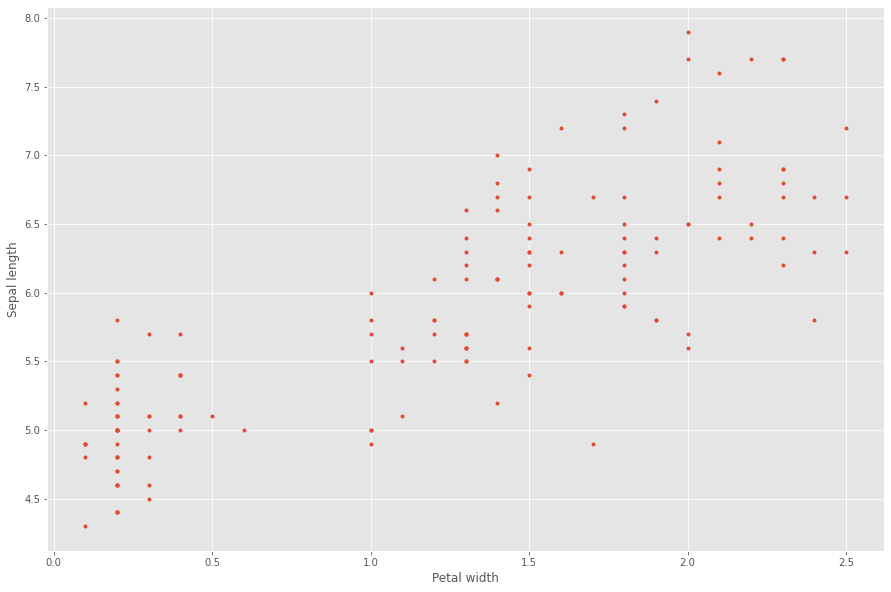

In [24]:

# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['petal_width'], df['sepal_length'], '.')

# Set axis labels.
ax.set_xlabel('Petal width');
ax.set_ylabel('Sepal length');


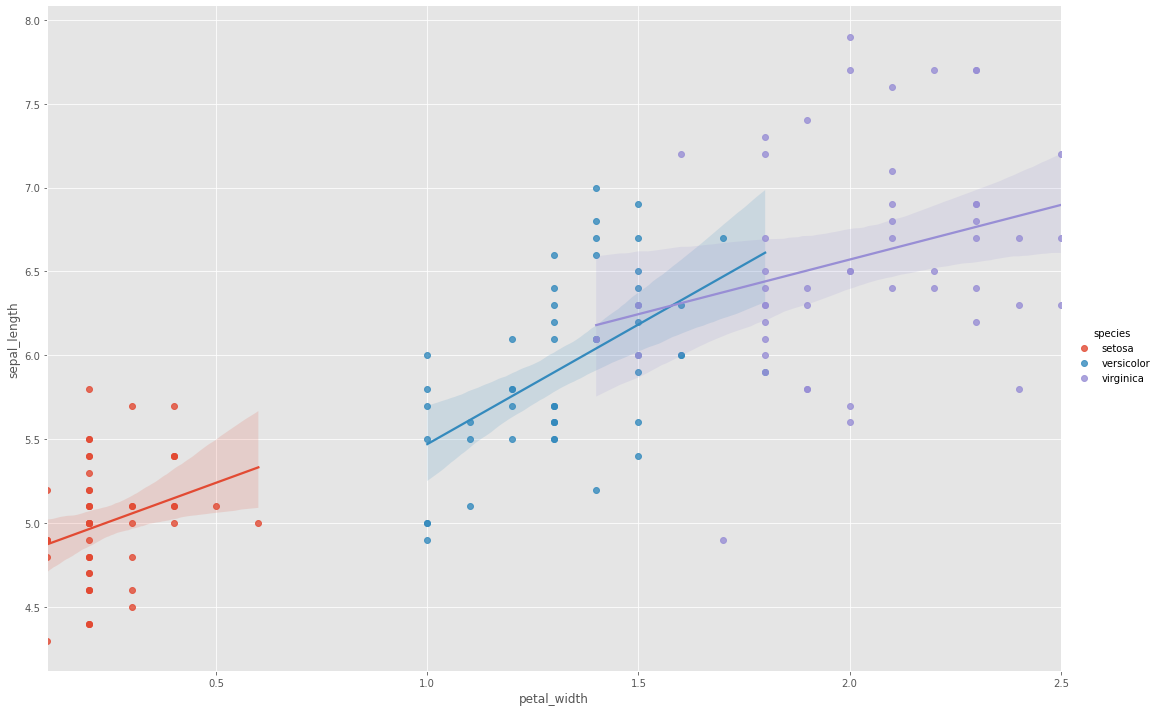

In [25]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="petal_width", y="sepal_length", hue='species', data=df, fit_reg=True, height=10, aspect=1.5);

Using Pyplot

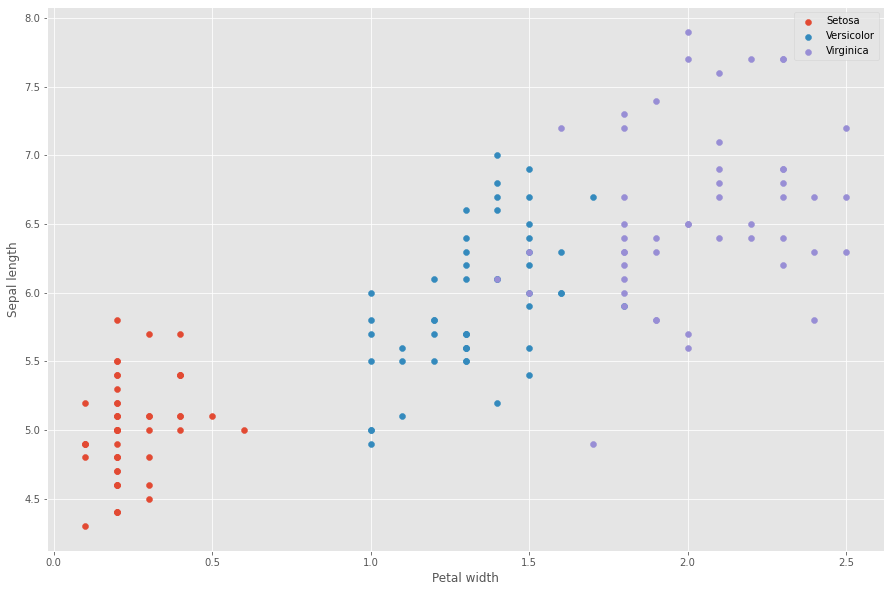

In [26]:
# Segregate the data.
setos = df[df['species'] == 'setosa']#take the species column and compare it to the datafram. The outside df brings it back to the plot
versi = df[df['species'] == 'versicolor']
virgi = df[df['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots. three plots on one
ax.scatter(setos['petal_width'], setos['sepal_length'], label='Setosa') #new names assigned them
ax.scatter(versi['petal_width'], versi['sepal_length'], label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label='Virginica')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [27]:
# How the segregation works.
df['species'] == 'virginica' #list of true and false and brings it back to the callout out where it is true

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [28]:
df[df['species'] == 'virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


Using groupby() - similar to SQL

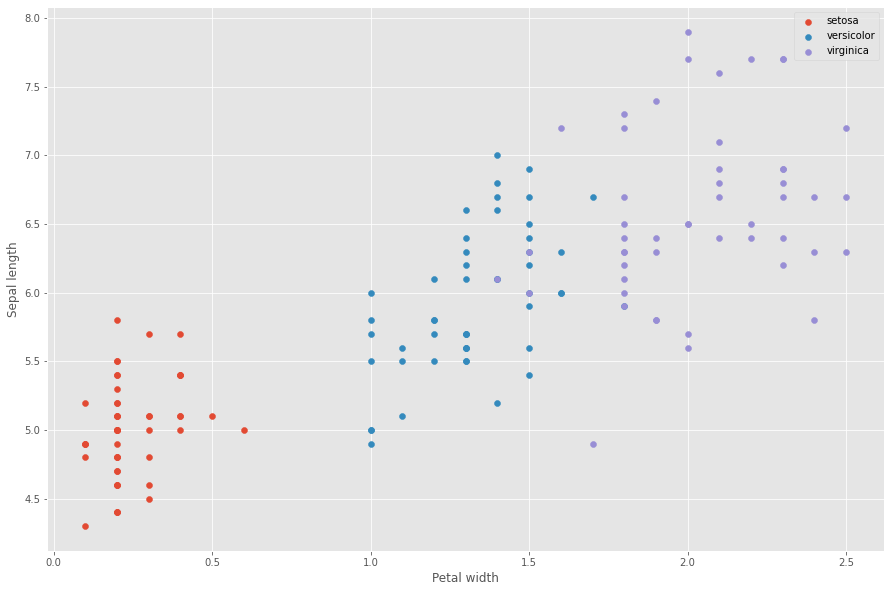

In [29]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for species, data in df.groupby('species'): #segreated by this variable - don't need to hard code values in three times
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [30]:
# Group by typically takes a categorical variable.
x = df.groupby('species')
x

In [31]:
# Pivot tables.
x.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [32]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'setosa'
j looks like:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


i is: 'versicolor'
j looks like:
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor


i is: 'virginica'
j looks like:
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica



Test and Train Split

In [35]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [36]:
# Show some training data.
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,setosa
111,6.4,2.7,5.3,1.9,virginica
134,6.1,2.6,5.6,1.4,virginica
107,7.3,2.9,6.3,1.8,virginica
42,4.4,3.2,1.3,0.2,setosa


In [37]:
# The indices of the train array.
train.index

Int64Index([ 38, 111, 134, 107,  42,  65,  45, 113,  82,  96,
            ...
             70,   8,  90,  10,  43,  67,  66,  68,  87,  52],
           dtype='int64', length=112)

In [38]:
# Show some testing data.
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica
122,7.7,2.8,6.7,2.0,virginica
83,6.0,2.7,5.1,1.6,versicolor
124,6.7,3.3,5.7,2.1,virginica
36,5.5,3.5,1.3,0.2,setosa


In [39]:
test.index.size

38

Two Dimensions: Test Train Split

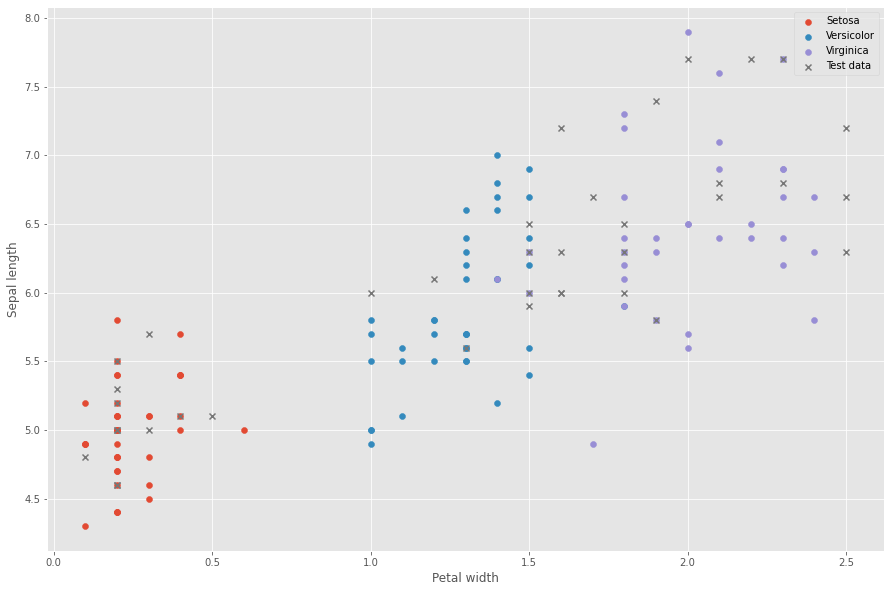

In [40]:
# Segregate the training data.
setos = train[train['species'] == 'setosa']
versi = train[train['species'] == 'versicolor']
virgi = train[train['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virginica')

# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

Two Dimensions: Inputs and Outputs

In [41]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['sepal_length', 'petal_width']], train['species']

In [42]:
# Peek at the inputs.
inputs.head()

,sepal_length,petal_width
38,4.4,0.2
111,6.4,1.9
134,6.1,1.4
107,7.3,1.8
42,4.4,0.2


In [43]:
# Peek at the outputs.
outputs.head()

38        setosa
111    virginica
134    virginica
107    virginica
42        setosa
Name: species, dtype: object

Two Dimensions: Logistic regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [44]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data. fit a model to our data set
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [45]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'petal_width']])
predictions

array(['virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa'], dtype=object)

In [48]:
# Eyeball the misclassifications.
predictions == test['species']

142     True
122     True
83      True
124     True
36      True
54      True
144     True
85      True
129     True
138     True
116     True
47      True
112     True
40      True
118     True
48      True
56      True
18      True
109     True
78      True
88      True
77     False
130     True
117     True
35      True
3       True
100     True
143     True
62      True
72      True
27      True
103     True
61      True
44      True
73      True
12      True
25      True
23      True
Name: species, dtype: bool

In [49]:
# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], test['species'])

0.9736842105263158

In [ ]:
Two Dimensions: Misclassified

In [51]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-51-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,sepal_length,sepal_width,petal_length,petal_width,species,predicted
142,5.8,2.7,5.1,1.9,virginica,virginica
122,7.7,2.8,6.7,2.0,virginica,virginica
83,6.0,2.7,5.1,1.6,versicolor,versicolor
124,6.7,3.3,5.7,2.1,virginica,virginica
36,5.5,3.5,1.3,0.2,setosa,setosa


In [52]:
# Show the misclassified data. bring out the ones that are not equal to the test species
misclass = test[test['predicted'] != test['species']]
misclass

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
77,6.7,3.0,5.0,1.7,versicolor,virginica


In [53]:
# Eyeball the descriptive statistics for the species.
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.984211,3.428947,1.452632,0.242105
versicolor,5.882051,2.741026,4.171795,1.289744
virginica,6.474286,2.925714,5.414286,2.000000


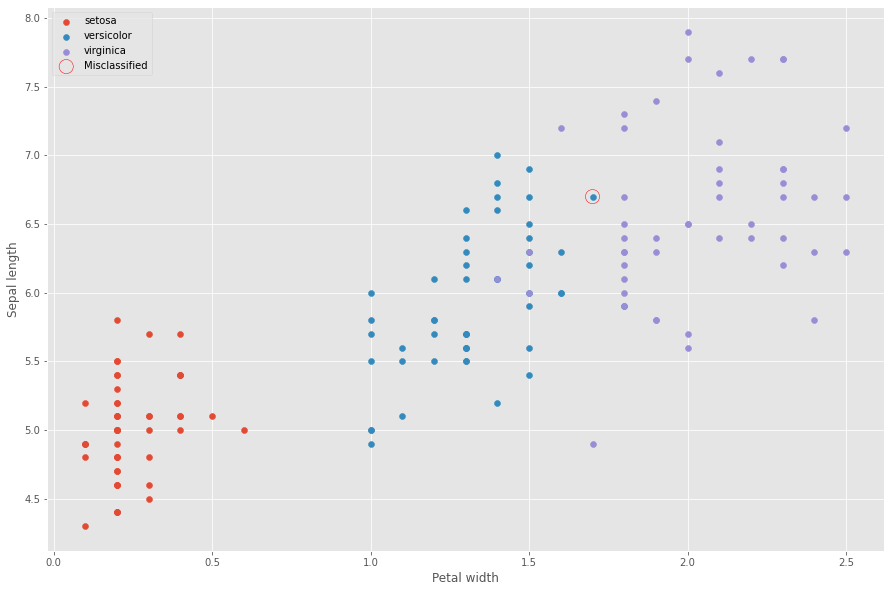

In [54]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
# Plot misclassified. NB red circle
ax.scatter(misclass['petal_width'], misclass['sepal_length'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();
#only plotting 2 dimensions - might not be as muc has an outlier if your were using 4 dimensions

Seperating Setosa

From Wikipedia:

ℓ=logbp1−p=β0+β1x1+β2x2

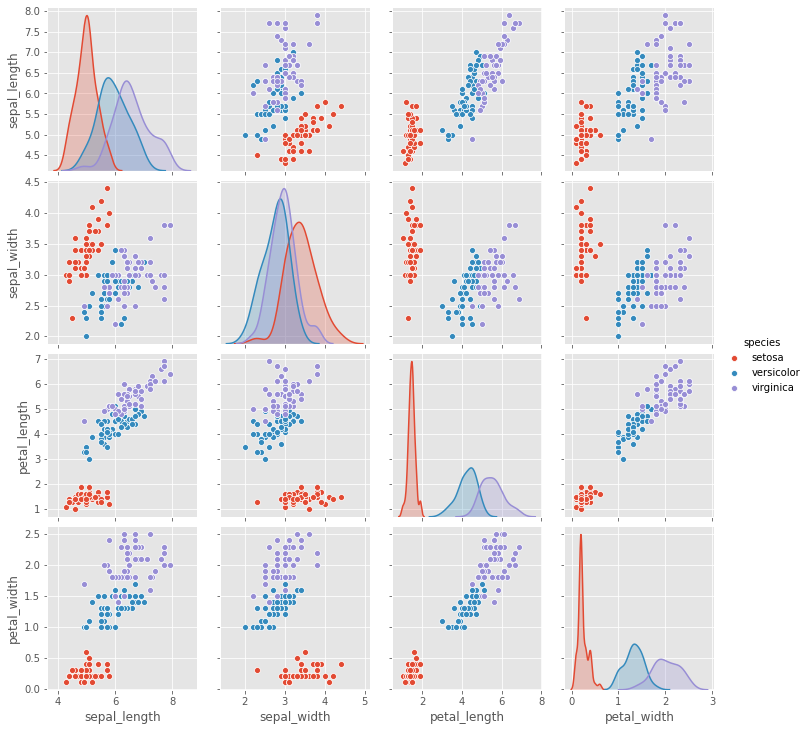

In [56]:
# Another look at this plot.
sns.pairplot(df, hue='species');

In [57]:
# Give the inputs and outputs convenient names.
inputs = train[['sepal_length', 'petal_width']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['species'].apply(lambda x: x if x == 'setosa' else 'other')

# Eyeball outputs
outputs.unique()

array(['setosa', 'other'], dtype=object)

In [58]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [59]:
actual = test['species'].apply(lambda x: x if x == 'setosa' else 'other')

# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], actual)

1.0

Using All Possible Inputs


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [61]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [62]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [63]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [65]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [66]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
predictions

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica'], dtype=object)

In [67]:
# Eyeball the misclassifications.
(predictions == test['species']).value_counts()

True     35
False     3
Name: species, dtype: int64

In [68]:
# What proportion were correct?
lre.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

0.9210526315789473

k Nearest Neighbours Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [69]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [70]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [71]:
# Use all four possible inputs.
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [72]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [73]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [74]:
# Test.
knn.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

0.9473684210526315

In [75]:
# Predict.
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
(predictions == test['species']).value_counts()

True     37
False     1
Name: species, dtype: int64

In [76]:
# The score is just the accuracy in this case.
(predictions == test['species']).value_counts(normalize=True)

True     0.973684
False    0.026316
Name: species, dtype: float64

Cross Validation

https://scikit-learn.org/stable/modules/cross_validation.html

In [77]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [78]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


In [79]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

C:\Users\Owner1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Owner1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [80]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.9733333333333334 	 Standard Deviation: 0.02494438257849294


The End